![market.JPG](attachment:market.JPG)

# **Association Rules**

Association Rules Analysis has become familiar for analysis in the retail industry. It is also called Market Basket Analysis terms. This analysis is also used for advice. Personal recommendations in applications such as Spotify, Netflix, and Youtube can be given as examples. 
[](http://)
One of the biggest examples of Association Rules Analysis is the correlation between beer and diaper. When Walmart, a chain store in the United States, studied the shopping behavior of customers, the study showed that diapers and beers are bought together. Because, as it turns out, fathers are often tasked with shopping while mothers stay with the baby.


# **Apriori Algorithm**

The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts. These algorithm properties and data are evaluated with Boolean Association Rules. In this algorithm, there are product clusters that pass frequently, and then strong relationships between these products and other products are sought.

The importance of an Association Rules can be determined by 3 parameters that are used to identify the strength of the algorithm. Namely,

* Support
* Confidence
* Lift


Let X and Y represent the products in the market and N represents the total number of products.


![image.png](attachment:image.png)


**Support**     :  It is the probability of an event to occur.

**Confidence**  :  It is a measure of conditional probability

**Lift**        : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.



**Import the Libraries and Dataset**

The first step, as always, is to import the required libraries.    
In the script below I import pandas, numpy, and apriori libraries.



In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv("GroceryStoreDataSet.csv", names = ['products'], sep = ',')


# df = pd.read_csv(r'C:\Users\DELL\Downloads\GroceryStoreDataSet.csv', names = ['products'], sep = ',')
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


Let's examine the shape of the data set,

In [3]:
df.shape

(20, 1)

Let's split the products and create a list called by 'data',

In [4]:
data = list(df["products"].apply(lambda x:x.split(",") ))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

**Apriori Algorithm and One-Hot Encoding**
 
Apriori's algorithm transforms True/False or 1/0.  
Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list.  
Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.


In [5]:
#Let's transform the list, with one-hot encoding
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


**Applying Apriori and Resulting**

The next step is to create the Apriori Model. We can change all the parameters in the Apriori Model in the mlxtend package.   
I will try to use minimum support parameters for this modeling.    
For this, I set a min_support value with a threshold value of 20% and printed them on the screen as well.
 

In [6]:
#set a threshold value for the support value and calculate the support value.
df = apriori(df, min_support = 0.01, use_colnames = True)
df

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.35,(BISCUIT)
1,0.2,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.4,(COFFEE)
...,...,...
78,0.05,"(MAGGI, BREAD, TEA, BISCUIT)"
79,0.1,"(CORNFLAKES, COFFEE, COCK, BISCUIT)"
80,0.05,"(BREAD, JAM, MAGGI, MILK)"
81,0.05,"(MAGGI, JAM, TEA, BREAD)"


I chose the 60% minimum confidence value.
In other words, when product X is purchased, we can say that the purchase of product Y is 60% or more.

In [7]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.5)
df_ar


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(COCK),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950000,0.558824
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.500000,1.666667,0.0400,1.400000,0.500000
...,...,...,...,...,...,...,...,...,...,...
141,"(CORNFLAKES, TEA)","(MILK, COFFEE)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
142,"(CORNFLAKES, MILK)","(TEA, COFFEE)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
143,"(TEA, COFFEE)","(CORNFLAKES, MILK)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
144,"(MILK, COFFEE)","(CORNFLAKES, TEA)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368


C:\Users\HP\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\HP\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='support', ylabel='confidence'>

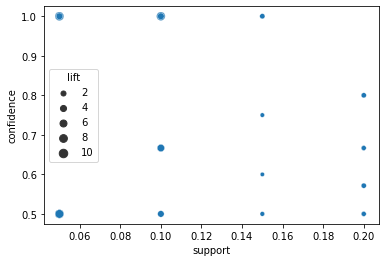

In [8]:
import seaborn as sns
sns.scatterplot(x="support", y="confidence", size="lift", data=df_ar)
